<a href="https://colab.research.google.com/github/JoelForson/Brittish-Airways-Customer-Insight-Analysis/blob/main/Assignment%202/Econ_5200_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Phase 1: The Robustness Audit (Topic 4)

In [4]:
# Manual DGP Simulation
import numpy as np
normal_traffic = np.random.randint(20, 50, 980)
spike_traffic = np.random.randint(1000, 5000, 20)
latency_logs = np.concatenate([normal_traffic, spike_traffic])

In [21]:
# Old Version
[]
def calculate_median_mad(data):
    median = np.median([latency_logs]) # 1. Calculate the Median of the data
    mad = np.mean(np.abs(latency_logs - median))# 2. Calculate Absolute Deviations (|x - median|)
    mad_median = np.median(mad) # 3. Return the Median of those deviations
    return print("Median:", median,"Mad:", mad,"Mad_Median:",mad_median)

# Corrected Version
[]
def calculate_mad(data):
    median = np.median(data)
    abs_devs = np.abs(data - median)
    return np.median(abs_devs)
calculate_mad(latency_logs)

np.float64(8.0)

In [30]:
print("MAD:", calculate_mad(latency_logs))
print("---"* 15)
print('Old MAD:', calculate_median_mad(latency_logs))

MAD: 8.0
---------------------------------------------
Median: 35.0 Mad: 63.307 Mad_Median: 63.307
Old MAD: None


In [15]:
median = np.median([latency_logs]) # 1. Calculate the Median of the data
MAD = np.mean(np.abs(latency_logs - median))# 2. Calculate Absolute Deviations (|x - median|)
median = np.median(latency_logs) # 3. Return the Median of those deviations
print("Median:", median,
      "MAD:", MAD,
      "Median:", np.median(latency_logs)
)

Median: 35.0 MAD: 63.307 Median: 35.0


# Phase 2: The Probability Audit (Topic 5)



In [18]:
def bayesian_audit(prior, sensitivity, specificity):
    fpr = 1 - specificity
    return (sensitivity * prior) / ((sensitivity * prior) + (fpr * (1 - prior)))

sens, spec = 0.98, 0.98
scenarios = {"Bootcamp (50%)": 0.50, "Econ Class (5%)": 0.05, "Honors Seminar (0.1%)": 0.001}

for label, prior in scenarios.items():
    p = bayesian_audit(prior, sens, spec)
    print(f"{label}: P(Cheater|Flagged) = {p:.2%}")

Bootcamp (50%): P(Cheater|Flagged) = 98.00%
Econ Class (5%): P(Cheater|Flagged) = 72.06%
Honors Seminar (0.1%): P(Cheater|Flagged) = 4.68%


# Phase 3: The Bias Audit (Topic 6)

In [ ]:
# Chi-Square Formula: Sum( (Observed - Expected)^2 / Expected )
observed = np.array()
expected = np.array()
# Write the calculation loop...

In [19]:
import numpy as np

observed = np.array([50_250, 49_750])
expected = np.array([50_000, 50_000])

chi_sq = np.sum((observed - expected)**2 / expected)

print(f"χ² = {chi_sq:.4f} {'>' if chi_sq > 3.84 else '≤'} 3.84 (critical)")
print("REJECT: Engineering bias detected." if chi_sq > 3.84
      else "FAIL TO REJECT: 500-user gap is random noise.")

χ² = 2.5000 ≤ 3.84 (critical)
FAIL TO REJECT: 500-user gap is random noise.


# Phase 4: AI Expansion (The Co-Pilot Era)

   SURVIVORSHIP BIAS AUDIT — CRYPTO TOKEN MARKET
   Tokens Simulated:            10,000
   Survivors (Top 1%):             100
   Graveyard (Bottom 99%):       9,900
--------------------------------------------------------------
   Mean Market Cap (ALL):          $    279,229.13
   Median Market Cap (ALL):        $     45,396.06
--------------------------------------------------------------
   Mean Market Cap (SURVIVORS):    $ 13,179,535.48
   Median Market Cap (SURVIVORS):  $  7,293,752.65
--------------------------------------------------------------
   Mean Market Cap (GRAVEYARD):    $    148,923.01

   BIAS MULTIPLIER: Survivors appear 47.2x
   more successful than the true market average.

   This is what crypto influencers show you (survivors)
   vs. what actually happens (the graveyard).


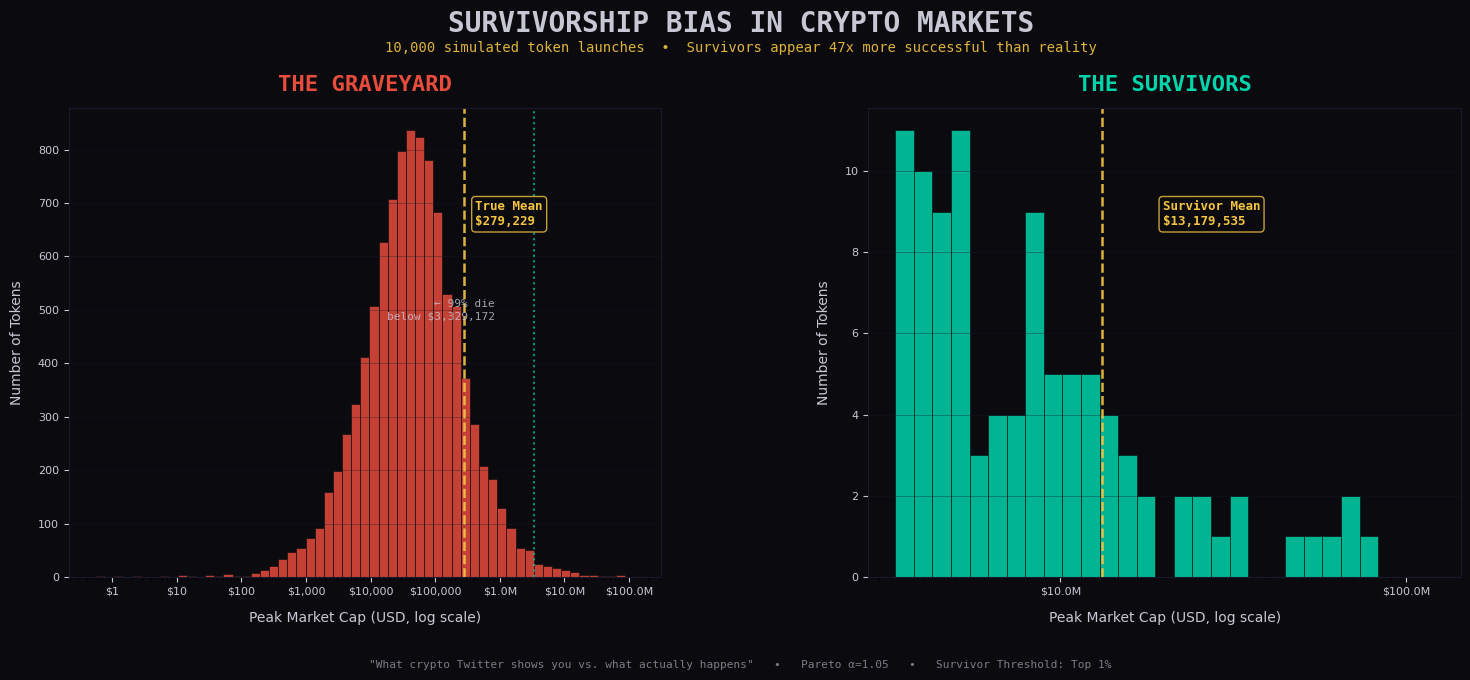


[✓] Chart saved to survivorship_bias_crypto.png


In [3]:
"""
Survivorship Bias in Crypto Markets
=====================================
Simulates 10,000 token launches using a Pareto (Power Law) distribution
to demonstrate how the visible "winners" distort our perception of the market.

Author: Joel | Financial Data Scientist Simulation
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd

np.random.seed(42)

# ──────────────────────────────────────────────
# 1. SIMULATE 10,000 TOKEN LAUNCHES
# ──────────────────────────────────────────────
n_tokens = 10_000

# Pareto distribution: shape parameter (alpha) controls the tail heaviness.
# Lower alpha = heavier tail = more extreme inequality.
# alpha ~1.05 produces a brutal power law where ~99% cluster near zero.
alpha = 1.05
raw_caps = np.random.pareto(a=alpha, size=n_tokens)

# Scale to realistic market caps (in millions USD)
# Minimum viable cap ~$1K, scale so the distribution spans a wide range
peak_market_caps = raw_caps * 50_000  # in USD, raw pareto * scale factor

# ──────────────────────────────────────────────
# 2. BUILD THE TWO DATAFRAMES
# ──────────────────────────────────────────────
df_all = pd.DataFrame({
    "token_id": range(1, n_tokens + 1),
    "peak_market_cap": peak_market_caps,
    "status": "launched"
})

# Top 1% by peak market cap = the "survivors"
threshold = np.percentile(peak_market_caps, 99)
df_survivors = df_all[df_all["peak_market_cap"] >= threshold].copy()
df_survivors["status"] = "survivor"

# The rest = the graveyard
df_graveyard = df_all[df_all["peak_market_cap"] < threshold].copy()
df_graveyard["status"] = "dead"

# ──────────────────────────────────────────────
# 3. CALCULATE BIAS METRICS
# ──────────────────────────────────────────────
mean_all       = df_all["peak_market_cap"].mean()
median_all     = df_all["peak_market_cap"].median()
mean_survivors = df_survivors["peak_market_cap"].mean()
median_surv    = df_survivors["peak_market_cap"].median()
mean_graveyard = df_graveyard["peak_market_cap"].mean()

bias_multiplier = mean_survivors / mean_all

print("=" * 62)
print("   SURVIVORSHIP BIAS AUDIT — CRYPTO TOKEN MARKET")
print("=" * 62)
print(f"   Tokens Simulated:        {n_tokens:>10,}")
print(f"   Survivors (Top 1%):      {len(df_survivors):>10,}")
print(f"   Graveyard (Bottom 99%):  {len(df_graveyard):>10,}")
print("-" * 62)
print(f"   Mean Market Cap (ALL):          ${mean_all:>14,.2f}")
print(f"   Median Market Cap (ALL):        ${median_all:>14,.2f}")
print("-" * 62)
print(f"   Mean Market Cap (SURVIVORS):    ${mean_survivors:>14,.2f}")
print(f"   Median Market Cap (SURVIVORS):  ${median_surv:>14,.2f}")
print("-" * 62)
print(f"   Mean Market Cap (GRAVEYARD):    ${mean_graveyard:>14,.2f}")
print("=" * 62)
print(f"\n   BIAS MULTIPLIER: Survivors appear {bias_multiplier:.1f}x")
print(f"   more successful than the true market average.\n")
print("   This is what crypto influencers show you (survivors)")
print("   vs. what actually happens (the graveyard).")
print("=" * 62)

# ──────────────────────────────────────────────
# 4. VISUALIZATION — DUAL HISTOGRAM
# ──────────────────────────────────────────────

# -- Color Palette --
BG_COLOR     = "#0A0A0F"
GRID_COLOR   = "#1A1A2E"
GRAVE_COLOR  = "#E74C3C"   # red for the dead
SURV_COLOR   = "#00D4AA"   # teal for survivors
TEXT_COLOR   = "#C8C8D4"
ACCENT_GOLD  = "#F5C542"

fig, axes = plt.subplots(1, 2, figsize=(16, 7), facecolor=BG_COLOR)
fig.subplots_adjust(wspace=0.35, left=0.08, right=0.95, top=0.82, bottom=0.15)

# ── LEFT PANEL: The Graveyard (log scale) ──
ax1 = axes[0]
ax1.set_facecolor(BG_COLOR)

# Use log-spaced bins for the heavy-tailed distribution
log_bins_all = np.logspace(
    np.log10(peak_market_caps.min()),
    np.log10(peak_market_caps.max()),
    60
)

ax1.hist(df_all["peak_market_cap"], bins=log_bins_all, color=GRAVE_COLOR,
         alpha=0.85, edgecolor="#0A0A0F", linewidth=0.5)
ax1.set_xscale("log")
ax1.set_title("THE GRAVEYARD", fontsize=16, fontweight="bold",
              color=GRAVE_COLOR, pad=12, fontfamily="monospace")
ax1.set_xlabel("Peak Market Cap (USD, log scale)", fontsize=10, color=TEXT_COLOR, labelpad=10)
ax1.set_ylabel("Number of Tokens", fontsize=10, color=TEXT_COLOR, labelpad=10)

# Annotate the mean
ax1.axvline(mean_all, color=ACCENT_GOLD, linestyle="--", linewidth=1.8, alpha=0.9)
ax1.text(mean_all * 1.5, ax1.get_ylim()[1] * 0.75,
         f"True Mean\n${mean_all:,.0f}",
         color=ACCENT_GOLD, fontsize=9, fontweight="bold",
         fontfamily="monospace", ha="left",
         bbox=dict(boxstyle="round,pad=0.3", facecolor="#0A0A0F", edgecolor=ACCENT_GOLD, alpha=0.8))

# Threshold line
ax1.axvline(threshold, color=SURV_COLOR, linestyle=":", linewidth=1.5, alpha=0.7)
ax1.text(threshold * 0.25, ax1.get_ylim()[1] * 0.55,
         f"← 99% die\nbelow ${threshold:,.0f}",
         color=TEXT_COLOR, fontsize=8, fontfamily="monospace", ha="right", alpha=0.8)

# Style
ax1.tick_params(colors=TEXT_COLOR, labelsize=8)
ax1.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"${x:,.0f}" if x < 1e6 else f"${x/1e6:.1f}M"))
for spine in ax1.spines.values():
    spine.set_color(GRID_COLOR)
ax1.grid(axis="y", color=GRID_COLOR, linewidth=0.5, alpha=0.5)

# ── RIGHT PANEL: The Survivors (what you see on Twitter) ──
ax2 = axes[1]
ax2.set_facecolor(BG_COLOR)

log_bins_surv = np.logspace(
    np.log10(df_survivors["peak_market_cap"].min()),
    np.log10(df_survivors["peak_market_cap"].max()),
    30
)

ax2.hist(df_survivors["peak_market_cap"], bins=log_bins_surv, color=SURV_COLOR,
         alpha=0.85, edgecolor="#0A0A0F", linewidth=0.5)
ax2.set_xscale("log")
ax2.set_title("THE SURVIVORS", fontsize=16, fontweight="bold",
              color=SURV_COLOR, pad=12, fontfamily="monospace")
ax2.set_xlabel("Peak Market Cap (USD, log scale)", fontsize=10, color=TEXT_COLOR, labelpad=10)
ax2.set_ylabel("Number of Tokens", fontsize=10, color=TEXT_COLOR, labelpad=10)

# Annotate survivor mean
ax2.axvline(mean_survivors, color=ACCENT_GOLD, linestyle="--", linewidth=1.8, alpha=0.9)
ax2.text(mean_survivors * 1.5, ax2.get_ylim()[1] * 0.75,
         f"Survivor Mean\n${mean_survivors:,.0f}",
         color=ACCENT_GOLD, fontsize=9, fontweight="bold",
         fontfamily="monospace", ha="left",
         bbox=dict(boxstyle="round,pad=0.3", facecolor="#0A0A0F", edgecolor=ACCENT_GOLD, alpha=0.8))

# Style
ax2.tick_params(colors=TEXT_COLOR, labelsize=8)
ax2.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"${x:,.0f}" if x < 1e6 else f"${x/1e6:.1f}M"))
for spine in ax2.spines.values():
    spine.set_color(GRID_COLOR)
ax2.grid(axis="y", color=GRID_COLOR, linewidth=0.5, alpha=0.5)

# ── SUPTITLE ──
fig.suptitle("SURVIVORSHIP BIAS IN CRYPTO MARKETS",
             fontsize=20, fontweight="bold", color=TEXT_COLOR,
             fontfamily="monospace", y=0.96)
fig.text(0.5, 0.90,
         f"10,000 simulated token launches  •  "
         f"Survivors appear {bias_multiplier:.0f}x more successful than reality",
         ha="center", fontsize=10, color=ACCENT_GOLD, fontfamily="monospace", alpha=0.9)

# ── BOTTOM ANNOTATION ──
fig.text(0.5, 0.02,
         '"What crypto Twitter shows you vs. what actually happens"   •   '
         f'Pareto α={alpha}   •   Survivor Threshold: Top 1%',
         ha="center", fontsize=8, color=TEXT_COLOR, fontfamily="monospace", alpha=0.6)

plt.savefig("survivorship_bias_crypto.png", dpi=200, facecolor=BG_COLOR,
            bbox_inches="tight", pad_inches=0.3)
plt.show()

print("\n[✓] Chart saved to survivorship_bias_crypto.png")